In [32]:
%run -i template.py

data (210, 7)
 target (210,)
 target_names 3
 feature_names 7
data_pd (210, 8)


In [3]:
check_data(data_pd)

NULL: area                     0
perimeter                0
compactness              0
length-kernel            0
width-kernel             0
asymmetry-coefficient    0
length-kernel-groove     0
class                    0
dtype: int64
Min: area                        10.59
perimeter                   12.41
compactness                0.8081
length-kernel               4.899
width-kernel                 2.63
asymmetry-coefficient      0.7651
length-kernel-groove        4.519
class                    Canadian
dtype: object


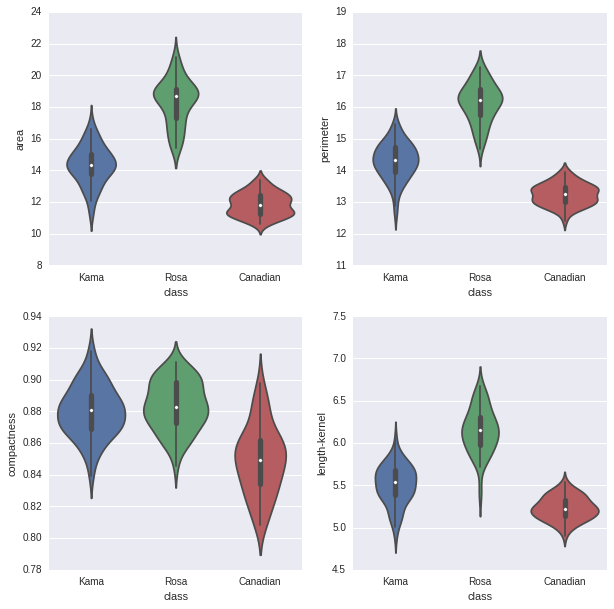

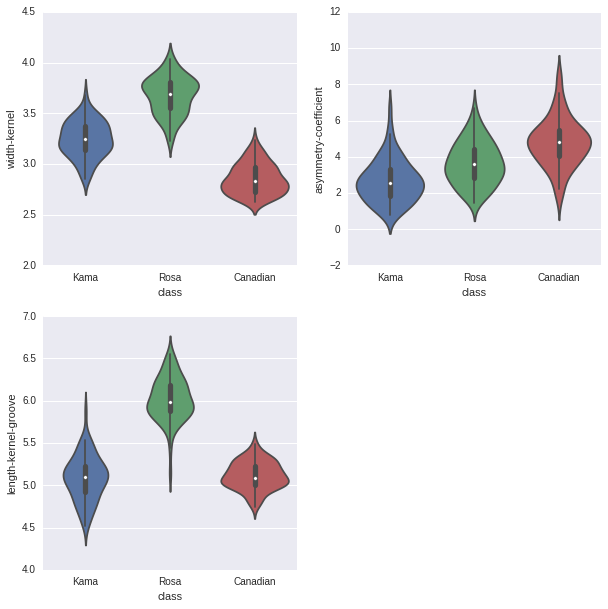

In [8]:
violinplot(data_pd, feature_names)

In [9]:
show_class_dis(data_pd)

|类别|样本数|
|-|-|
|Rosa|70|
|Canadian|70|
|Kama|70|


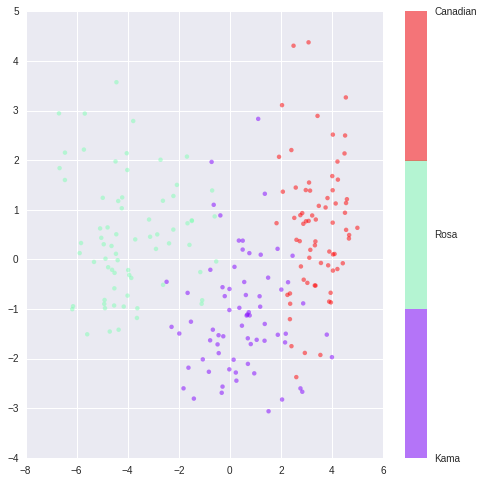

In [12]:
pca, data_pca = PCA_Process(data, target, target_names)

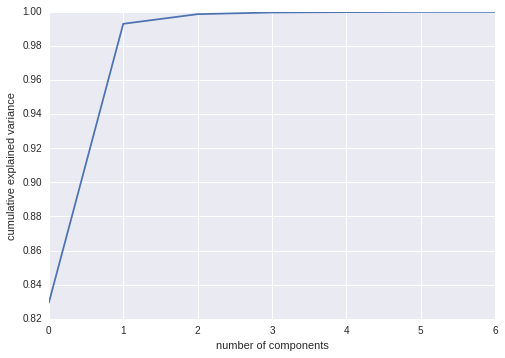

In [13]:
pca_ = show_pca_en(data)

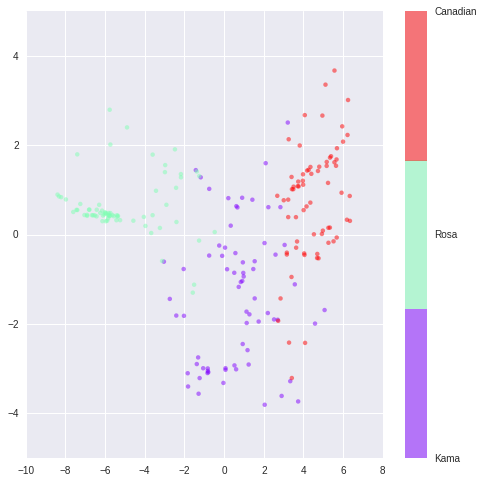

In [14]:
iso, data_projected = iso_map(data, target, target_names)

In [15]:
grid_knn = find_best_knn(data,target,cv=10)

In [16]:
grid_knn.grid_scores_

[mean: 0.87619, std: 0.11508, params: {'weights': 'uniform', 'n_neighbors': 1},
 mean: 0.87619, std: 0.11508, params: {'weights': 'distance', 'n_neighbors': 1},
 mean: 0.87143, std: 0.12608, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.87619, std: 0.11508, params: {'weights': 'distance', 'n_neighbors': 2},
 mean: 0.89048, std: 0.09048, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.88571, std: 0.08832, params: {'weights': 'distance', 'n_neighbors': 3},
 mean: 0.88571, std: 0.08025, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.87619, std: 0.08571, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.89524, std: 0.08729, params: {'weights': 'uniform', 'n_neighbors': 8},
 mean: 0.90000, std: 0.08896, params: {'weights': 'distance', 'n_neighbors': 8},
 mean: 0.90000, std: 0.09863, params: {'weights': 'uniform', 'n_neighbors': 10},
 mean: 0.90476, std: 0.09035, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.89524, std: 0.10605, pa

In [17]:
grid_knn.best_score_, grid_knn.best_estimator_, grid_knn.best_params_

(0.90476190476190477,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=10, p=2,
            weights='distance'),
 {'n_neighbors': 10, 'weights': 'distance'})

In [18]:
grid_dc_tree = find_best_decisiontree(data, target, cv=10)

In [19]:
grid_dc_tree.grid_scores_

[mean: 0.87619, std: 0.06459, params: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'},
 mean: 0.90476, std: 0.07377, params: {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'gini'},
 mean: 0.87619, std: 0.08025, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'gini'},
 mean: 0.91905, std: 0.07982, params: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'gini'},
 mean: 0.91429, std: 0.07911, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'gini'},
 mean: 0.86667, std: 0.12381, params: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'gini'},
 mean: 0.88095, std: 0.10045, params: {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'criterion': 'gini'},
 mean: 0.87619, std: 0.08832, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'},

In [21]:
grid_dc_tree.best_score_, grid_dc_tree.best_estimator_, grid_dc_tree.best_params_

(0.9285714285714286,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
             min_samples_split=8, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 {'criterion': 'gini',
  'max_depth': 30,
  'min_samples_leaf': 2,
  'min_samples_split': 8})

In [22]:
grid_logistic = find_best_logistic(data, target, cv=10)

In [23]:
grid_logistic.grid_scores_

[mean: 0.90476, std: 0.05634, params: {'C': 0.1},
 mean: 0.91905, std: 0.05654, params: {'C': 0.5},
 mean: 0.92381, std: 0.05714, params: {'C': 1},
 mean: 0.94286, std: 0.05129, params: {'C': 5},
 mean: 0.94762, std: 0.04972, params: {'C': 10}]

In [24]:
grid_logistic.best_score_, grid_logistic.best_estimator_, grid_logistic.best_params_

(0.94761904761904758,
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 10})

In [25]:
grid_svm = find_best_svm(data, target, cv=10)

In [26]:
grid_svm.grid_scores_

[mean: 0.90000, std: 0.11359, params: {'C': 0.1, 'kernel': 'linear'},
 mean: 0.94286, std: 0.07619, params: {'C': 0.1, 'kernel': 'poly'},
 mean: 0.89524, std: 0.10605, params: {'C': 0.1, 'kernel': 'rbf'},
 mean: 0.90476, std: 0.09035, params: {'C': 0.5, 'kernel': 'linear'},
 mean: 0.94286, std: 0.07619, params: {'C': 0.5, 'kernel': 'poly'},
 mean: 0.90000, std: 0.09630, params: {'C': 0.5, 'kernel': 'rbf'},
 mean: 0.90952, std: 0.09147, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.94762, std: 0.07810, params: {'C': 1, 'kernel': 'poly'},
 mean: 0.90000, std: 0.09630, params: {'C': 1, 'kernel': 'rbf'},
 mean: 0.91905, std: 0.09048, params: {'C': 5, 'kernel': 'linear'},
 mean: 0.94286, std: 0.07619, params: {'C': 5, 'kernel': 'poly'},
 mean: 0.90476, std: 0.11066, params: {'C': 5, 'kernel': 'rbf'},
 mean: 0.93333, std: 0.07737, params: {'C': 10, 'kernel': 'linear'},
 mean: 0.94286, std: 0.07619, params: {'C': 10, 'kernel': 'poly'},
 mean: 0.91905, std: 0.08262, params: {'C': 10, 'kernel'

In [27]:
grid_svm.best_score_, grid_svm.best_estimator_, grid_svm.best_params_

(0.94761904761904758, SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False), {'C': 1, 'kernel': 'poly'})

In [28]:
grid_random_forest = find_best_random_forest(data, target, cv=10)

In [29]:
grid_random_forest.grid_scores_

[mean: 0.90476, std: 0.10648, params: {'n_estimators': 10},
 mean: 0.91429, std: 0.09712, params: {'n_estimators': 20},
 mean: 0.90952, std: 0.09392, params: {'n_estimators': 35},
 mean: 0.90476, std: 0.08248, params: {'n_estimators': 50},
 mean: 0.90952, std: 0.09863, params: {'n_estimators': 80},
 mean: 0.91429, std: 0.09476, params: {'n_estimators': 100},
 mean: 0.91905, std: 0.07982, params: {'n_estimators': 120},
 mean: 0.92381, std: 0.08025, params: {'n_estimators': 150},
 mean: 0.92381, std: 0.08025, params: {'n_estimators': 200}]

In [30]:
grid_random_forest.best_score_, grid_random_forest.best_estimator_, grid_random_forest.best_params_

(0.92380952380952386,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
             oob_score=False, random_state=0, verbose=0, warm_start=False),
 {'n_estimators': 150})

In [33]:
show_model_table()

|Classifier|Mean Score|Std|
|-|-|-|
|KNeighborsClassifier|0.9048|0.0904|
|DecisionTreeClassifier|0.9286|0.0714|
|LogisticRegression|0.9476|0.0497|
|SVC|0.9476|0.0781|
|RandomForestClassifier|0.9238|0.0802|


In [34]:
show_confusion_matrix('LogisticRegression', data, target, target_names,0, 0.2)

score:  0.952380952381
[[12  1  0]
 [ 1 15  0]
 [ 0  0 13]]
|实际\预测|Kama|Rosa|Canadian|
|-|-|-|-|
|Kama|12|1|0|
|Rosa|1|15|0|
|Canadian|0|0|13|
class: 0 Kama rate: 0.923076923077
predict to: Rosa  : [ 17.08    15.38     0.9079   5.832    3.683    2.956    5.484 ]
class: 1 Rosa rate: 0.9375
predict to: Kama  : [ 15.99    14.89     0.9064   5.363    3.582    3.336    5.144 ]
class: 2 Canadian rate: 1.0


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
